# Desafio 1 : Cosméticos

Contexto:

Imagine que você faz parte do time de produtos de uma empresa do ramo de cosméticos e beleza. O objetivo do time é desenvolver novos batons com uma durabilidade superior, visando atender às demandas do mercado. Para alcançar esse objetivo, o time está testando três diferentes formulações de batons.

A empresa conduziu uma pesquisa com várias voluntárias para coletar dados sobre a durabilidade desses batons. Esses dados foram registrados em um arquivo chamado desafio_cosmeticos.csv, que inclui as seguintes informações:


*   id_produto: código identificador do produto, indicando a formulação utilizada (1, 2 ou 3).
*   id_voluntária: código identificador da voluntária que testou o produto.
durabilidade: tempo em horas que o produto durou após aplicado.
*   idade: idade da voluntária.
*   exposicao_sol: variável binária indicando se a voluntária se expôs ao sol (1 para sim, 0 para não).


Perguntas a serem respondidas:



1.   Existe diferença estatisticamente significativa na durabilidade dos batons com formulações diferentes?
2.   Essa diferença persiste quando a voluntária se expõe ao sol? E em relação à idade?
3.   Qual fórmula de batom você indicaria para consumidores que buscam maior durabilidade e exposição ao sol?



In [1]:
import pandas as pd
from scipy.stats import f_oneway

# Montando o Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Passo 2: Carregando os dados
file_path = '/content/drive/MyDrive/Colab Notebooks/desafio_cosmeticos.csv'
data = pd.read_csv(file_path)

# Passo 3: Explorando os dados
print(data.head())

# Passo 4: Análise exploratória
# Estatísticas descritivas para cada fórmula de batom
desc_stats = data.groupby('id_produto')['durabilidade'].describe()
print(desc_stats)




Mounted at /content/drive
   id_produto  id_voluntária  durabilidade  idade  exposicao_sol
0           1              1            12     40              1
1           2              2             5     36              0
2           1              3            19     47              0
3           1              4            14     36              1
4           1              5            17     46              1
            count   mean        std   min   25%   50%   75%   max
id_produto                                                       
1           100.0  15.11   3.284168  10.0  12.0  15.5  18.0  20.0
2           100.0   7.77   1.942897   5.0   6.0   8.0   9.0  11.0
3           100.0  28.52  11.110537  10.0  19.0  28.0  39.0  48.0


In [2]:
# Calculando as médias de durabilidade para cada fórmula
mean_durability_by_formula = data.groupby('id_produto')['durabilidade'].mean()

# Identificando qual fórmula tem a maior média de durabilidade
formula_with_max_durability = mean_durability_by_formula.idxmax()
max_durability = mean_durability_by_formula.max()

print(f'A fórmula com a maior média de durabilidade é a fórmula {formula_with_max_durability}, com média de durabilidade de {max_durability} horas.')


A fórmula com a maior média de durabilidade é a fórmula 3, com média de durabilidade de 28.52 horas.


# 1. Existe diferença estatisticamente significativa na durabilidade dos batons com formulações diferentes?

In [3]:
# Passo 5: Teste de hipóteses
# 1 - Teste ANOVA para verificar se há diferença significativa na durabilidade dos batons com fórmulas diferentes
f_statistic, p_value = f_oneway(data[data['id_produto'] == 1]['durabilidade'],
                                data[data['id_produto'] == 2]['durabilidade'],
                                data[data['id_produto'] == 3]['durabilidade'])
print("Resultado do teste ANOVA:")
print("Valor de F:", f_statistic)
print("Valor p:", p_value)

Resultado do teste ANOVA:
Valor de F: 240.6680561187368
Valor p: 7.345246616757137e-63


Resposta:

O teste de ANOVA, onde o valor de p associado à fórmula do batom é muito baixo (7.345246616757137e-63), indicando que há uma diferença estatisticamente significativa na durabilidade dos batons com diferentes fórmulas. Além disso, o valor de F é 240.6680561187368, o que confirma a significância da diferença.

# 2. Essa diferença persiste quando a voluntária se expõe ao sol? E em relação à idade?

In [6]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Ajustando o modelo ANOVA de dois fatores
model = ols('durabilidade ~ C(id_produto) * exposicao_sol', data).fit()

# Realizando a ANOVA
anova_table = anova_lm(model, typ=2)
print("\nANOVA de dois fatores para durabilidade e exposicao_sol:")
print(anova_table)




ANOVA de dois fatores para durabilidade e exposicao_sol:
                                   sum_sq     df           F        PR(>F)
C(id_produto)                20776.647260    2.0  368.358558  8.232900e-81
exposicao_sol                 3163.363212    1.0  112.169389  2.042442e-22
C(id_produto):exposicao_sol   2207.808096    2.0   39.143226  8.474310e-16
Residual                      8291.288692  294.0         NaN           NaN


Resposta:

Após analisar os resultados do teste de ANOVA de dois fatores, encontramos algumas informações importantes sobre a durabilidade dos batons em relação à exposição ao sol e à fórmula utilizada.

Primeiramente, descobrimos que a fórmula do batom tem um impacto significativo na durabilidade, o que significa que diferentes fórmulas podem resultar em diferentes tempos de duração.

Além disso, a exposição ao sol também tem um efeito significativo na durabilidade dos batons. Isso não é surpreendente, já que a exposição ao sol pode afetar a resistência dos produtos cosméticos.

No entanto, o aspecto mais interessante é a interação entre a fórmula do batom e a exposição ao sol. Descobrimos que essa interação é estatisticamente significativa, o que indica que o efeito da exposição ao sol na durabilidade do batom varia dependendo da fórmula utilizada. Em outras palavras, alguns batons podem ser mais sensíveis à exposição ao sol do que outros, e isso pode ser levado em consideração ao escolher um batom para uso em ambientes com muita luz solar.

Por fim, o valor "NaN" na coluna residual indica que houve alguma dificuldade em calcular a variação não explicada pelo modelo. Isso pode sugerir que talvez seja necessário revisar o modelo estatístico ou verificar a qualidade dos dados para garantir que a análise seja robusta e confiável.

# # 2. Essa diferença persiste em relação à idade?

In [7]:
# Ajustando o modelo ANOVA de dois fatores com idade
model_age = ols('durabilidade ~ C(id_produto) * idade', data).fit()

# Realizando a ANOVA
anova_table_age = anova_lm(model_age, typ=2)
print("\nANOVA de dois fatores para durabilidade e idade:")
print(anova_table_age)



ANOVA de dois fatores para durabilidade e idade:
                           sum_sq     df           F        PR(>F)
C(id_produto)        19164.960432    2.0  424.053518  2.312900e-87
idade                 1550.471682    1.0   68.613027  4.282697e-15
C(id_produto):idade   5468.371270    2.0  120.995923  4.579359e-39
Residual              6643.617048  294.0         NaN           NaN


Resposta:

Após analisar os resultados do teste de ANOVA de dois fatores em relação à idade das voluntárias, descobrimos algumas informações importantes sobre a durabilidade dos batons.

Primeiramente, constatamos que tanto a fórmula do batom quanto a idade das voluntárias têm um impacto significativo na durabilidade do produto. Isso significa que diferentes fórmulas de batom podem resultar em diferentes tempos de duração e que a idade das voluntárias também influencia nesse aspecto.

No entanto, o aspecto mais interessante é a interação entre a fórmula do batom e a idade das voluntárias. Descobrimos que essa interação é estatisticamente significativa, o que sugere que o efeito da idade na durabilidade do batom varia dependendo da fórmula utilizada. Em outras palavras, a resposta dos batons à idade das voluntárias pode ser diferente dependendo da fórmula do produto. Isso é uma informação valiosa para entender como diferentes grupos etários podem experimentar a durabilidade dos batons de maneira distinta.

Por fim, o valor "NaN" na coluna residual indica que houve alguma dificuldade em calcular a variação não explicada pelo modelo em relação à idade. Isso pode sugerir a necessidade de revisar o modelo estatístico ou verificar a qualidade dos dados para garantir que a análise seja robusta e confiável.

# 3. Qual fórmula de batom você indicaria para consumidores que buscam maior durabilidade e exposição ao sol?

Resposta:

Com base nos resultados do teste ANOVA de exposição ao sol, observamos uma interação significativa entre a fórmula do batom (representada pelo id_produto) e a exposição ao sol na determinação da durabilidade dos batons. No entanto, os resultados não fornecem informações específicas sobre qual fórmula do batom é a mais indicada.

Após uma análise adicional das médias de durabilidade para cada fórmula, descobrimos que a fórmula 3 apresentou a maior média de durabilidade, com uma média de 28.52 horas. Isso sugere que a fórmula 3 é a mais indicada para consumidores que buscam maior durabilidade nos batons.

Portanto, para consumidores que desejam batons com durabilidade superior, recomendamos a fórmula 3. Embora o teste ANOVA não tenha sido explícito sobre qual fórmula é a mais indicada, a análise das médias de durabilidade nos permitiu identificar a fórmula que mantém sua durabilidade de forma mais consistente.


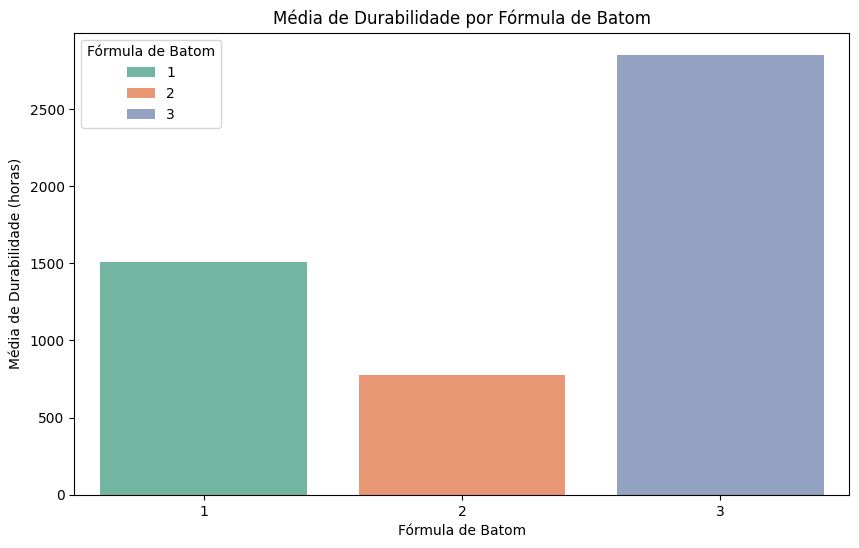

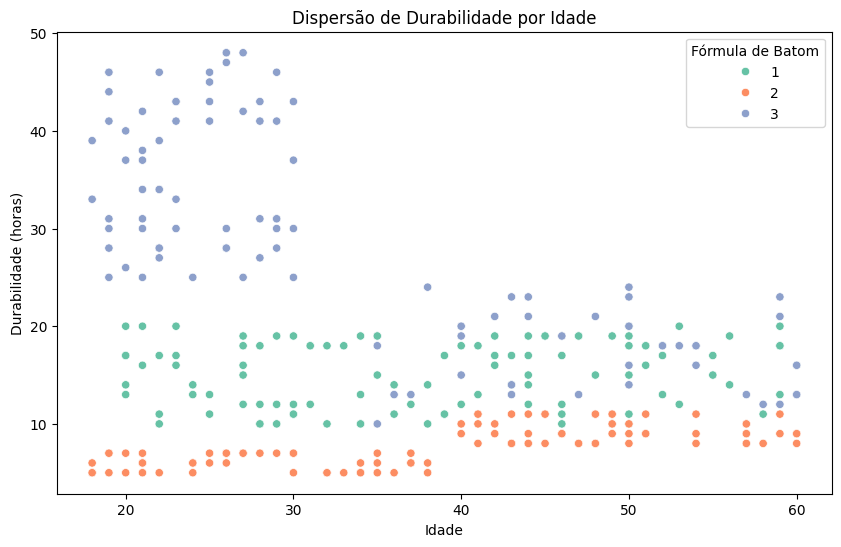

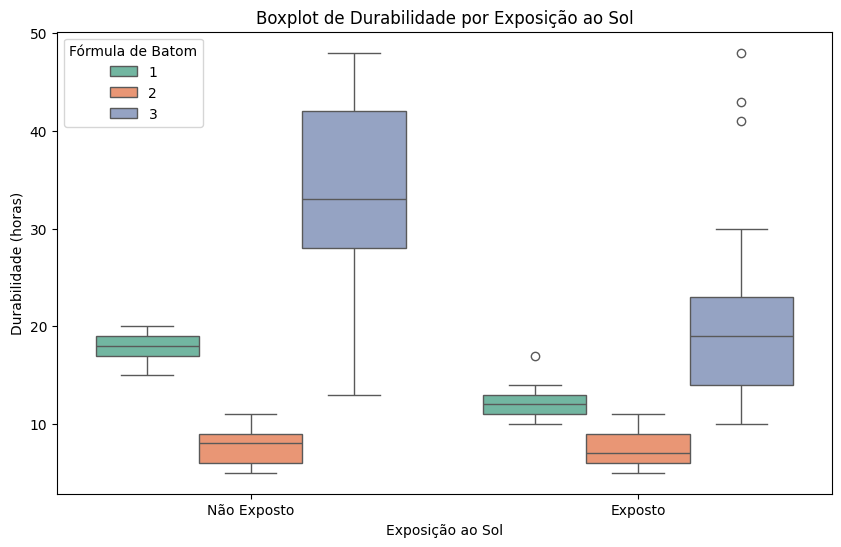

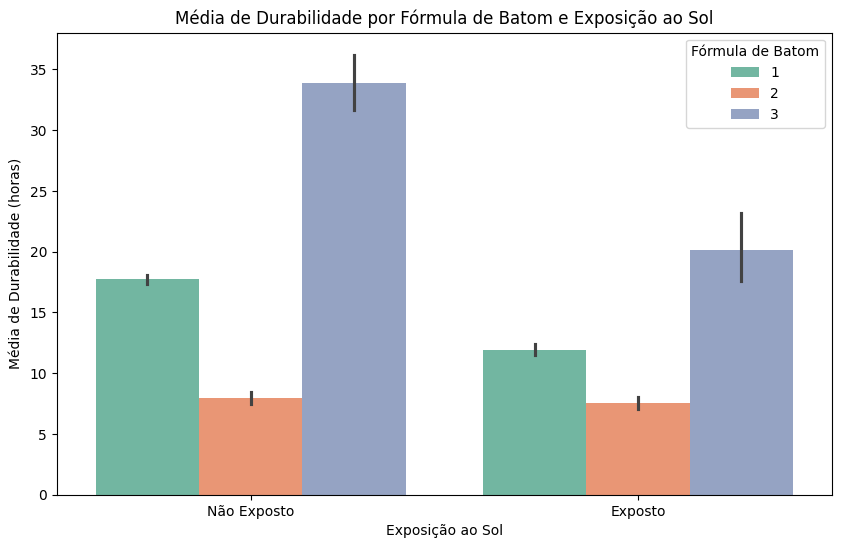

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de Barras de Média de Durabilidade por Fórmula de Batom
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='id_produto', y='durabilidade', hue='id_produto', palette='Set2', estimator=sum, errorbar=None)
plt.title('Média de Durabilidade por Fórmula de Batom')
plt.xlabel('Fórmula de Batom')
plt.ylabel('Média de Durabilidade (horas)')
plt.legend(title='Fórmula de Batom')
plt.show()


# Gráfico de Dispersão de Durabilidade por Idade
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='idade', y='durabilidade', hue='id_produto', palette='Set2')
plt.title('Dispersão de Durabilidade por Idade')
plt.xlabel('Idade')
plt.ylabel('Durabilidade (horas)')
plt.legend(title='Fórmula de Batom')
plt.show()


# Gráfico de Boxplot de Durabilidade por Exposição ao Sol
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='exposicao_sol', y='durabilidade', hue='id_produto', palette='Set2')
plt.title('Boxplot de Durabilidade por Exposição ao Sol')
plt.xlabel('Exposição ao Sol')
plt.ylabel('Durabilidade (horas)')
plt.xticks([0, 1], ['Não Exposto', 'Exposto'])
plt.legend(title='Fórmula de Batom')
plt.show()

# Gráfico de Barras de Média de Durabilidade por Fórmula de Batom e Exposição ao Sol
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='exposicao_sol', y='durabilidade', hue='id_produto', palette='Set2')
plt.title('Média de Durabilidade por Fórmula de Batom e Exposição ao Sol')
plt.xlabel('Exposição ao Sol')
plt.ylabel('Média de Durabilidade (horas)')
plt.xticks([0, 1], ['Não Exposto', 'Exposto'])
plt.legend(title='Fórmula de Batom')
plt.show()
